## Importing Libraries

In [247]:
import os

import pandas as pd

import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Importing regular expressions lib
import re

import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kunalindore/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kunalindore/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Checking the count of recording files in Train, Test, and Validate folders

In [248]:
train_path = 'recordings/train'
test_path = 'recordings/test'
validate_path = 'recordings/validate'

train_files = [f for f in os.listdir(train_path) if f.endswith('.wav') or f.endswith('.mp3')]  # Adjust file extensions as needed
test_files = [f for f in os.listdir(test_path) if f.endswith('.wav') or f.endswith('.mp3')]
validate_files = [f for f in os.listdir(validate_path) if f.endswith('.wav') or f.endswith('.mp3')]

In [249]:
print("Number of files in train:",len(train_files))
print()
print("Number of files in test:",len(test_files))
print()
print("Number of files in validate:",len(validate_files))
print()

Number of files in train: 381

Number of files in test: 5895

Number of files in validate: 385



In [250]:
# def count_audio_files(folder_path):
#     audio_count = 0
#     for file in os.listdir(folder_path):
#         if file.endswith('.wav') or file.endswith('.mp3'):
#             audio_count += 1
#     return audio_count

In [251]:
# counts_df = pd.DataFrame(columns=['Folder', 'Audio_Count'])

# counts_df.loc[0] = ['Train', count_audio_files(train_path)]
# counts_df.loc[1] = ['Test', count_audio_files(test_path)]
# counts_df.loc[2] = ['Validate', count_audio_files(validate_path)]

In [252]:
# print(counts_df)

## Exploring the Overview of recording CSV file

In [253]:
file_path = 'overview-of-recordings.csv'

df = pd.read_csv(file_path)

In [254]:
df.head()

,audio_clipping,audio_clipping:confidence,background_noise_audible,background_noise_audible:confidence,overall_quality_of_the_audio,quiet_speaker,quiet_speaker:confidence,speaker_id,file_download,file_name,phrase,prompt,writer_id
0,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,43453425,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43453425_58166571.wav,When I remember her I feel down,Emotional pain,21665495
1,light_clipping,0.6803,no_noise,0.6803,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_43347848.wav,When I carry heavy things I feel like breaking...,Hair falling out,44088126
2,no_clipping,1.0000,no_noise,0.6655,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_53187202.wav,there is too much pain when i move my arm,Heart hurts,44292353
3,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,31349958,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_31349958_55816195.wav,My son had his lip pierced and it is swollen a...,Infected wound,43755034
4,no_clipping,1.0000,no_noise,1.0000,4.67,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_82524191.wav,My muscles in my lower back are aching,Infected wound,21665495


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6661 entries, 0 to 6660
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   audio_clipping                       6661 non-null   object 
 1   audio_clipping:confidence            6661 non-null   float64
 2   background_noise_audible             6661 non-null   object 
 3   background_noise_audible:confidence  6661 non-null   float64
 4   overall_quality_of_the_audio         6661 non-null   float64
 5   quiet_speaker                        6661 non-null   object 
 6   quiet_speaker:confidence             6661 non-null   float64
 7   speaker_id                           6661 non-null   int64  
 8   file_download                        6661 non-null   object 
 9   file_name                            6661 non-null   object 
 10  phrase                               6661 non-null   object 
 11  prompt                        

## One Hot encoding categorical columns

In [257]:
df = pd.get_dummies(df, columns=['audio_clipping','background_noise_audible', 'quiet_speaker'],drop_first = True)

df.head()

,audio_clipping:confidence,background_noise_audible:confidence,overall_quality_of_the_audio,quiet_speaker:confidence,speaker_id,file_download,file_name,phrase,prompt,writer_id,audio_clipping_no_clipping,background_noise_audible_no_noise,quiet_speaker_quiet_speaker
0,1.0000,1.0000,3.33,1.0,43453425,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43453425_58166571.wav,When I remember her I feel down,Emotional pain,21665495,1,0,0
1,0.6803,0.6803,3.33,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_43347848.wav,When I carry heavy things I feel like breaking...,Hair falling out,44088126,0,1,0
2,1.0000,0.6655,3.33,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_53187202.wav,there is too much pain when i move my arm,Heart hurts,44292353,1,1,0
3,1.0000,1.0000,3.33,1.0,31349958,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_31349958_55816195.wav,My son had his lip pierced and it is swollen a...,Infected wound,43755034,1,0,0
4,1.0000,1.0000,4.67,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_82524191.wav,My muscles in my lower back are aching,Infected wound,21665495,1,1,0


In [258]:
df.describe()

,audio_clipping:confidence,background_noise_audible:confidence,overall_quality_of_the_audio,quiet_speaker:confidence,speaker_id,writer_id,audio_clipping_no_clipping,background_noise_audible_no_noise,quiet_speaker_quiet_speaker
count,6661.000000,6661.000000,6661.000000,6661.000000,6.661000e+03,6.661000e+03,6661.000000,6661.000000,6661.000000
mean,0.984625,0.854320,3.678268,0.984594,3.664962e+07,3.596655e+07,0.991893,0.528900,0.002252
std,0.070909,0.165967,0.378536,0.069719,1.029919e+07,1.341818e+07,0.089679,0.499202,0.047404
min,0.337800,0.336300,3.000000,0.342300,1.853182e+06,1.883056e+06,0.000000,0.000000,0.000000
25%,1.000000,0.671100,3.330000,1.000000,3.482490e+07,3.498746e+07,1.000000,0.000000,0.000000
50%,1.000000,1.000000,3.670000,1.000000,4.120334e+07,4.375503e+07,1.000000,1.000000,0.000000
75%,1.000000,1.000000,4.000000,1.000000,4.385622e+07,4.411874e+07,1.000000,1.000000,0.000000
max,1.000000,1.000000,5.000000,1.000000,4.444235e+07,4.434011e+07,1.000000,1.000000,1.000000


## Exploring categorical columns

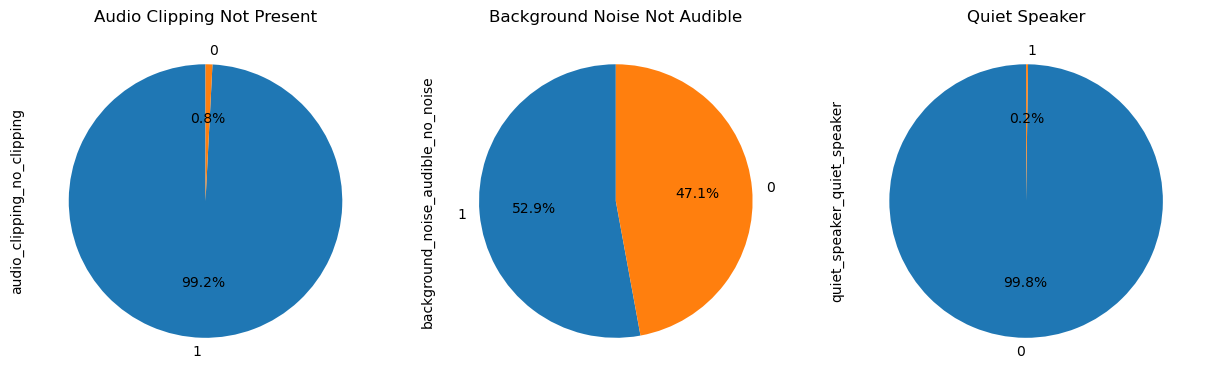

In [259]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

df['audio_clipping_no_clipping'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[0])
axes[0].set_title("Audio Clipping Not Present")

df['background_noise_audible_no_noise'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[1])
axes[1].set_title("Background Noise Not Audible")

df['quiet_speaker_quiet_speaker'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[2])
axes[2].set_title("Quiet Speaker")

plt.show()

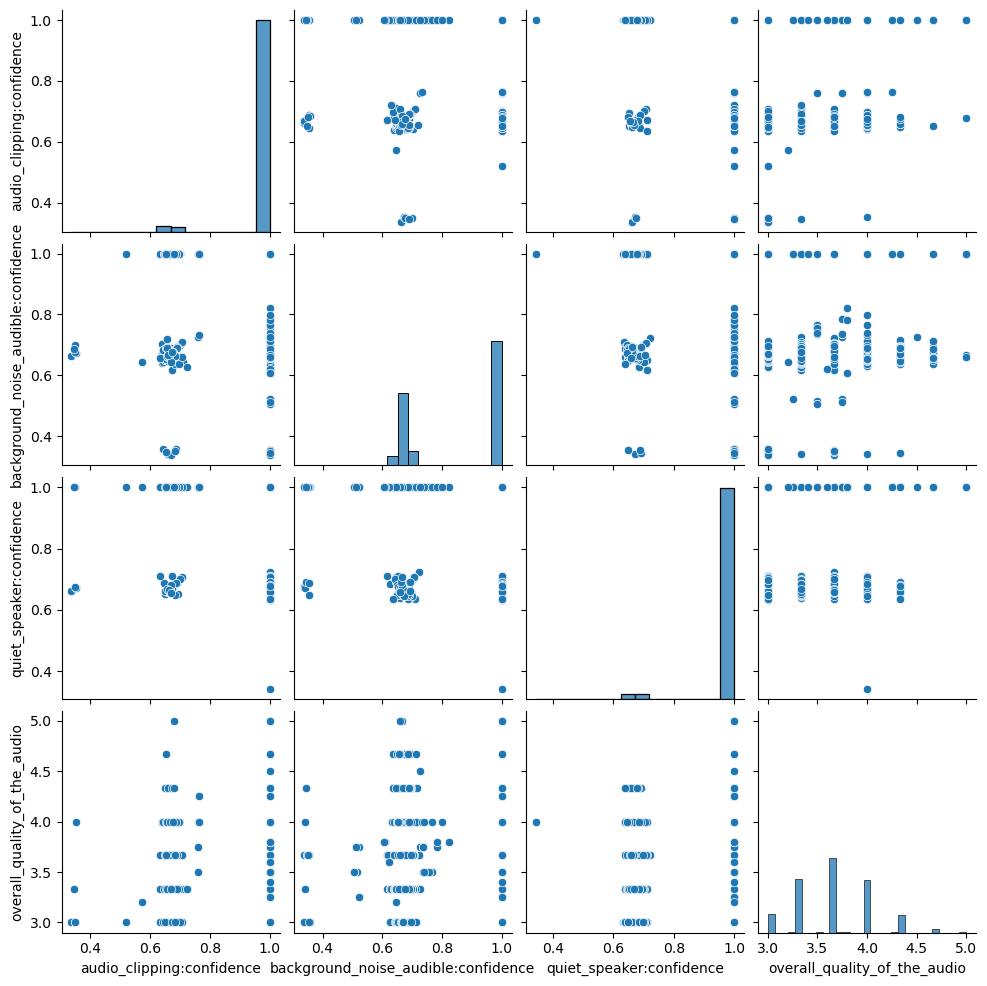

In [265]:
sns.pairplot(df[['audio_clipping:confidence', 'background_noise_audible:confidence', 'quiet_speaker:confidence', 'overall_quality_of_the_audio']])
plt.show()


Correlation Analysis:


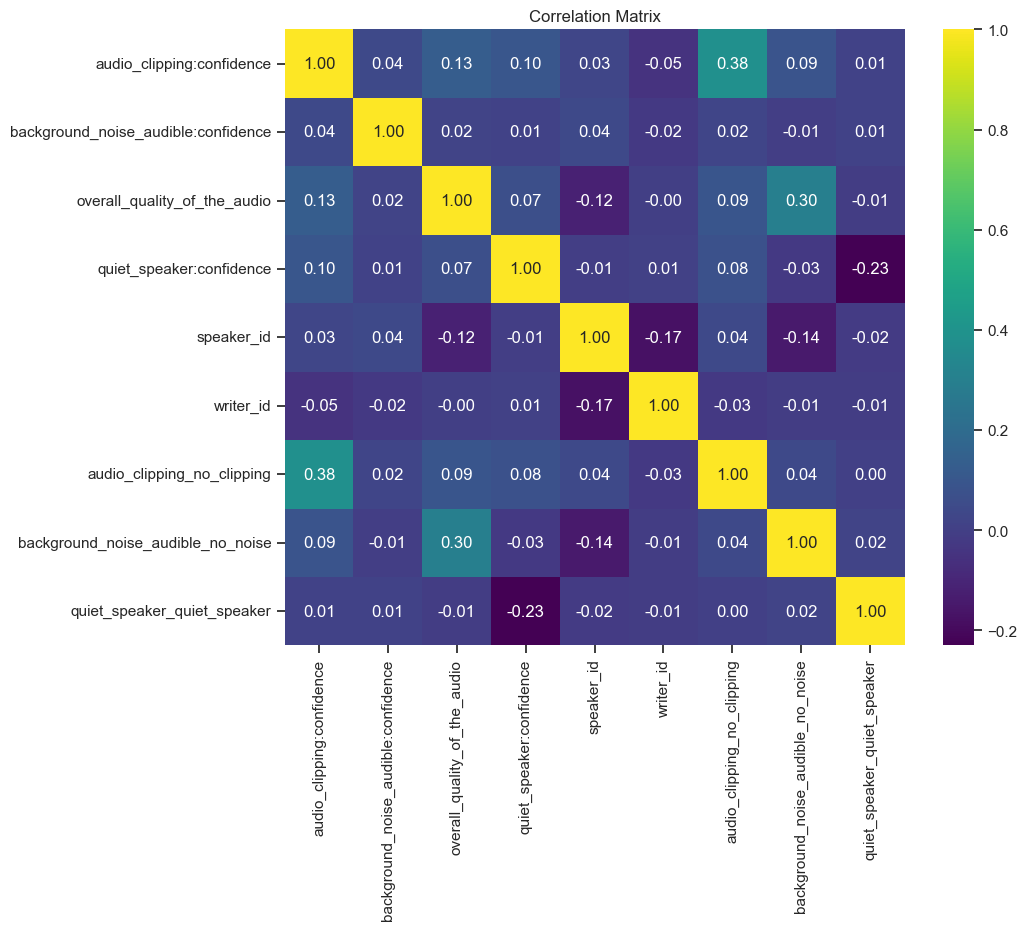

In [269]:
print("\nCorrelation Analysis:")
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



Audio Quality Analysis:


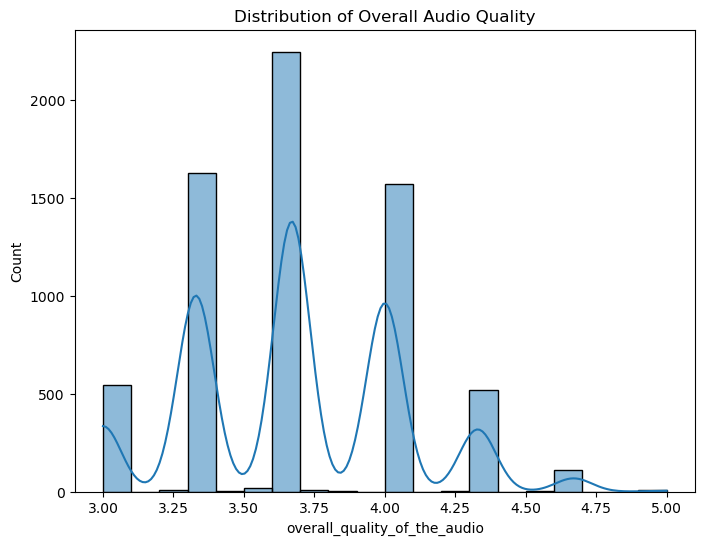

In [261]:
print("\nAudio Quality Analysis:")
plt.figure(figsize=(8, 6))
sns.histplot(df['overall_quality_of_the_audio'], bins=20, kde=True)
plt.title('Distribution of Overall Audio Quality')
plt.show()

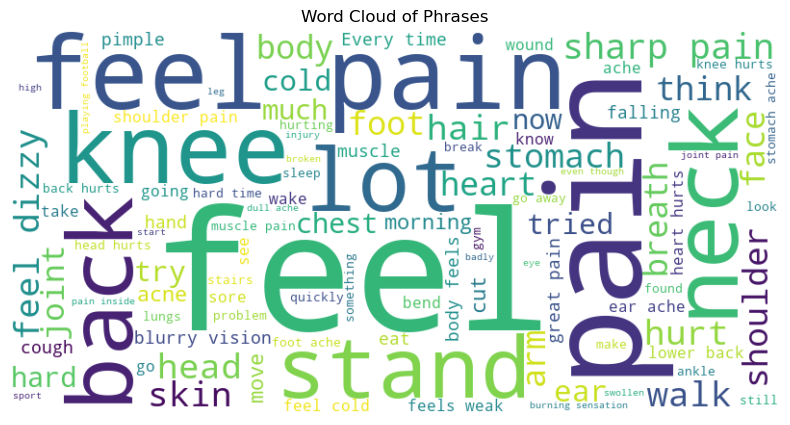

In [264]:
from wordcloud import WordCloud

text_data = " ".join(df['phrase'])
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Phrases')
plt.show()

## Exploring Target Prompts

In [218]:
print("Count of unique values:", df['prompt'].nunique())
print()
print("The unique prompts in target columns are:")
print(df['prompt'].unique())

Count of unique values: 25

The unique prompts in target columns are:
['Emotional pain' 'Hair falling out' 'Heart hurts' 'Infected wound'
 'Foot ache' 'Shoulder pain' 'Injury from sports' 'Skin issue'
 'Stomach ache' 'Knee pain' 'Joint pain' 'Hard to breath' 'Head ache'
 'Body feels weak' 'Feeling dizzy' 'Back pain' 'Open wound'
 'Internal pain' 'Blurry vision' 'Acne' 'Muscle pain' 'Neck pain' 'Cough'
 'Ear ache' 'Feeling cold']


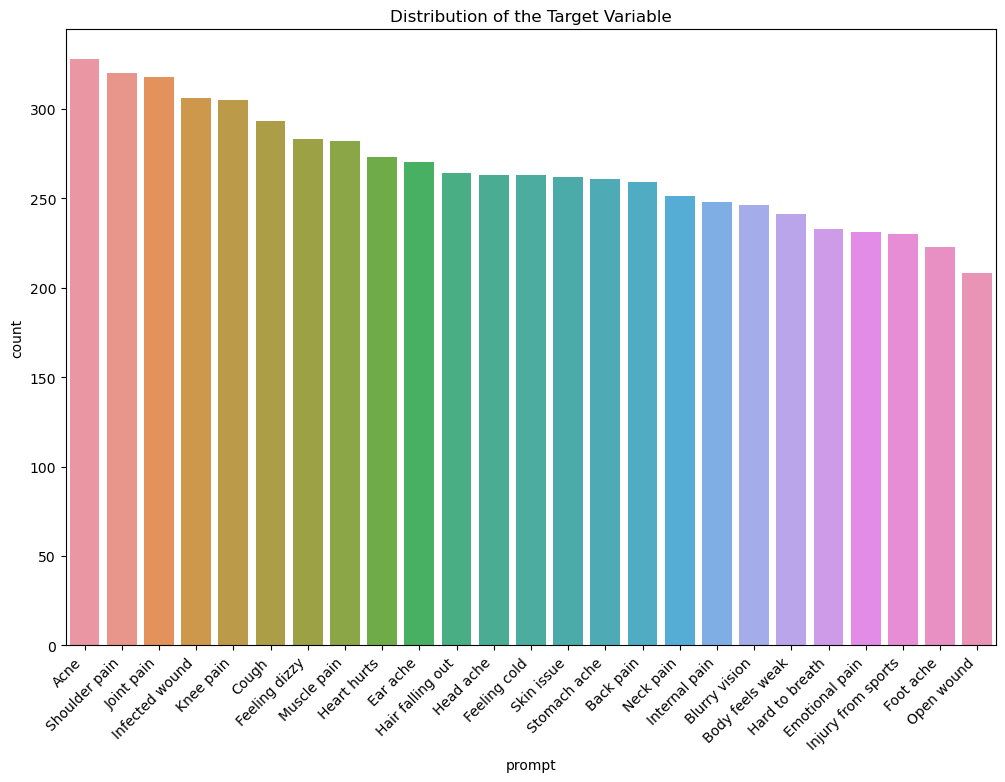

In [219]:
# Distribution of the target variable
plt.figure(figsize=(12, 8))
sns.countplot(x='prompt', data=df, order=df['prompt'].value_counts().index)
plt.title("Distribution of the Target Variable")
plt.xticks(rotation=45, ha='right')
plt.show()

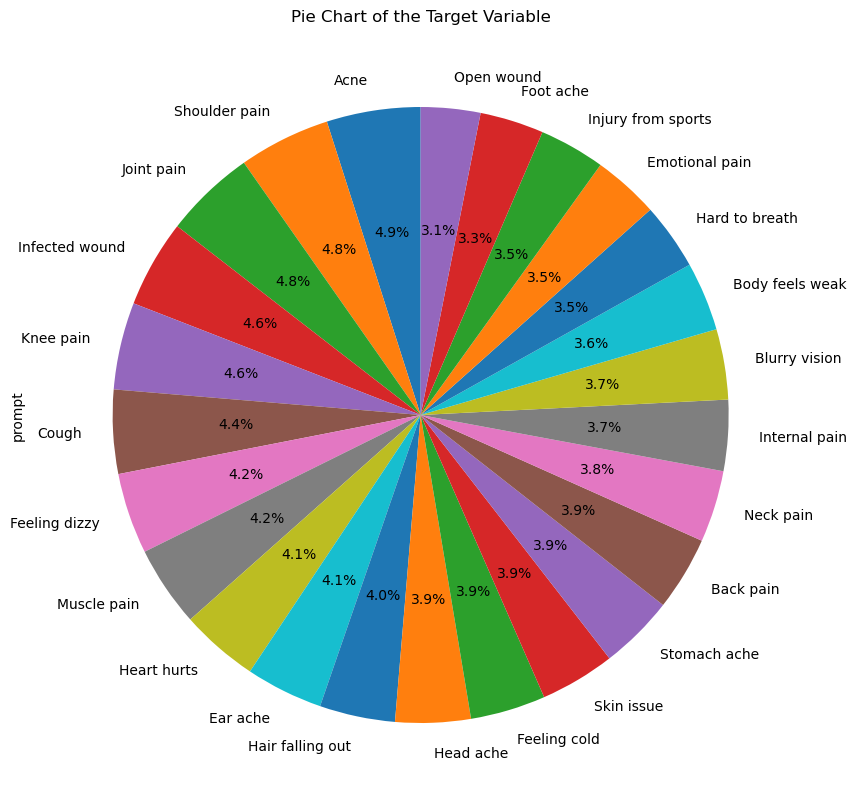

In [220]:
plt.figure(figsize=(10, 10))
df['prompt'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart of the Target Variable")
plt.show()

In [221]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'audio_clipping:confidence':
[1.     0.6803 0.6978 0.6609 0.6986 0.6438 0.6503 0.6555 0.6575 0.3378
 0.6757 0.6622 0.6486 0.6824 0.6623 0.6624 0.6815 0.6627 0.6631 0.7017
 0.6813 0.6667 0.6599 0.6701 0.6596 0.6644 0.6724 0.3523 0.6874 0.3506
 0.6556 0.6759 0.6695 0.6475 0.6577 0.651  0.6867 0.6871 0.6908 0.6944
 0.6984 0.6406 0.6918 0.6607 0.6861 0.6959 0.6769 0.6528 0.668  0.662
 0.3494 0.6553 0.6842 0.692  0.6554 0.6412 0.6458 0.6446 0.6776 0.672
 0.6849 0.6761 0.6567 0.6645 0.6689 0.6467 0.6625 0.6711 0.671  0.6533
 0.6774 0.6822 0.6957 0.6889 0.6648 0.6579 0.634  0.686  0.678  0.6445
 0.653  0.6834 0.64   0.6679 0.6621 0.6661 0.6422 0.6926 0.7067 0.6777
 0.6432 0.6414 0.6729 0.6566 0.635  0.6853 0.6727 0.68   0.6601 0.7007
 0.6531 0.649  0.6739 0.6847 0.6789 0.7117 0.6515 0.3472 0.6419 0.6656
 0.6725 0.6835 0.6617 0.6702 0.6979 0.6633 0.6923 0.6885 0.6712 0.6525
 0.6723 0.666  0.66   0.6652 0.6747 0.6839 0.6875 0.6966 0.6709 0.6444
 0.6619 0.6753 0.6768 0.66

## Preprocessing text columns

In [222]:
def preprocess_text(text):
  text = re.sub(r'[^a-zA-Z\s]','',text) #removing special character and digits
  text = text.lower()
  return text

In [223]:
df['phrase'] = df['phrase'].apply(preprocess_text)

In [224]:
df

,audio_clipping:confidence,background_noise_audible:confidence,overall_quality_of_the_audio,quiet_speaker:confidence,speaker_id,file_download,file_name,phrase,prompt,writer_id,audio_clipping_no_clipping,background_noise_audible_no_noise,quiet_speaker_quiet_speaker
0,1.0000,1.0000,3.33,1.0,43453425,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43453425_58166571.wav,when i remember her i feel down,Emotional pain,21665495,1,0,0
1,0.6803,0.6803,3.33,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_43347848.wav,when i carry heavy things i feel like breaking...,Hair falling out,44088126,0,1,0
2,1.0000,0.6655,3.33,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_53187202.wav,there is too much pain when i move my arm,Heart hurts,44292353,1,1,0
3,1.0000,1.0000,3.33,1.0,31349958,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_31349958_55816195.wav,my son had his lip pierced and it is swollen a...,Infected wound,43755034,1,0,0
4,1.0000,1.0000,4.67,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_82524191.wav,my muscles in my lower back are aching,Infected wound,21665495,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6656,1.0000,0.6076,3.80,1.0,14353703,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_14353703_45949288.wav,i feel a burning sensation in my guts about h...,Stomach ache,40925305,1,1,0
6657,1.0000,0.7829,3.80,1.0,15004831,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_15004831_26452554.wav,i have a split on my thumb that will not heal,Open wound,43755034,1,1,0
6658,1.0000,0.6061,3.80,1.0,15004831,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_15004831_64958100.wav,i feel a lot of pain in the joints,Joint pain,43772689,1,1,0
6659,1.0000,0.8215,3.80,1.0,15830408,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_15830408_92962528.wav,the area around my heart doesnt feel good,Heart hurts,44292353,1,1,0


## Splitting the dataframe according to train, test and validate and evaluating

In [225]:
train_df = df[df['file_name'].isin(train_files)]
test_df = df[df['file_name'].isin(test_files)]
validate_df = df[df['file_name'].isin(validate_files)]

In [226]:
print("Train: ",len(train_df))
print()
print("Test: ",len(test_df))
print()
print("Validate: ",len(validate_df))
print()

Train:  381

Test:  5895

Validate:  385



## Exploring Train, Test Validate

Train:



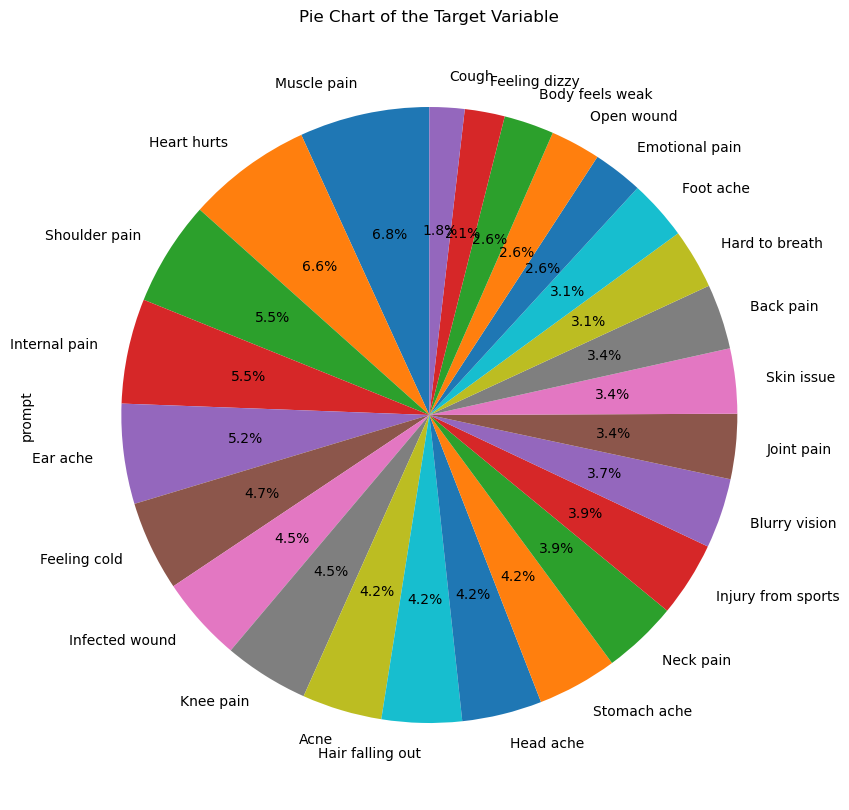

In [227]:
print("Train:")
print()
plt.figure(figsize=(10, 10))
train_df['prompt'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart of the Target Variable")
plt.show()

Test:



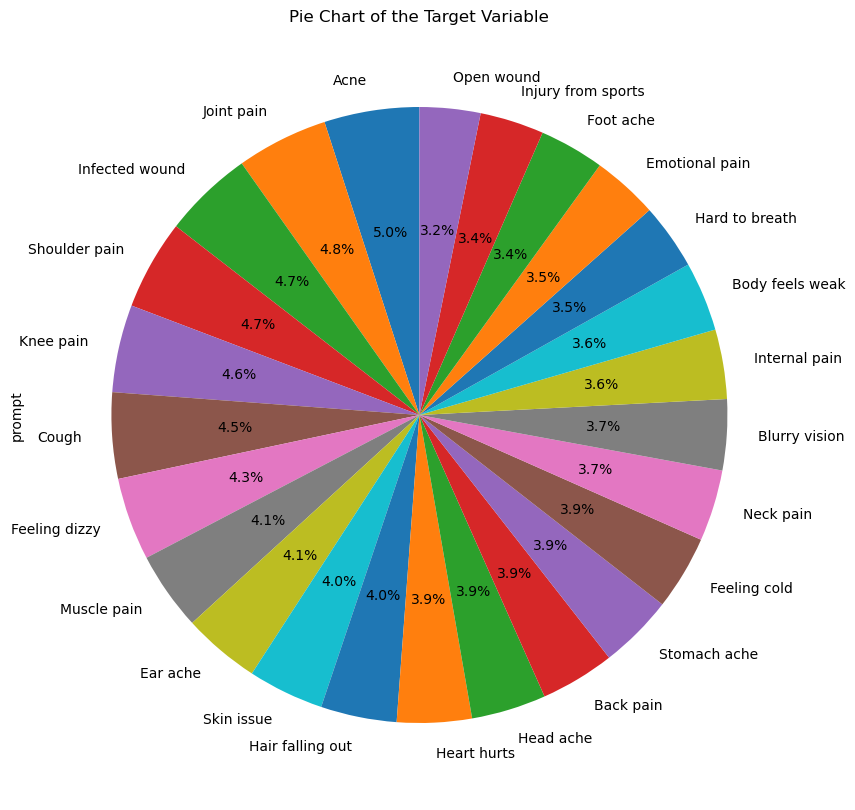

In [228]:
print("Test:")
print()
plt.figure(figsize=(10, 10))
test_df['prompt'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart of the Target Variable")
plt.show()

Validate:



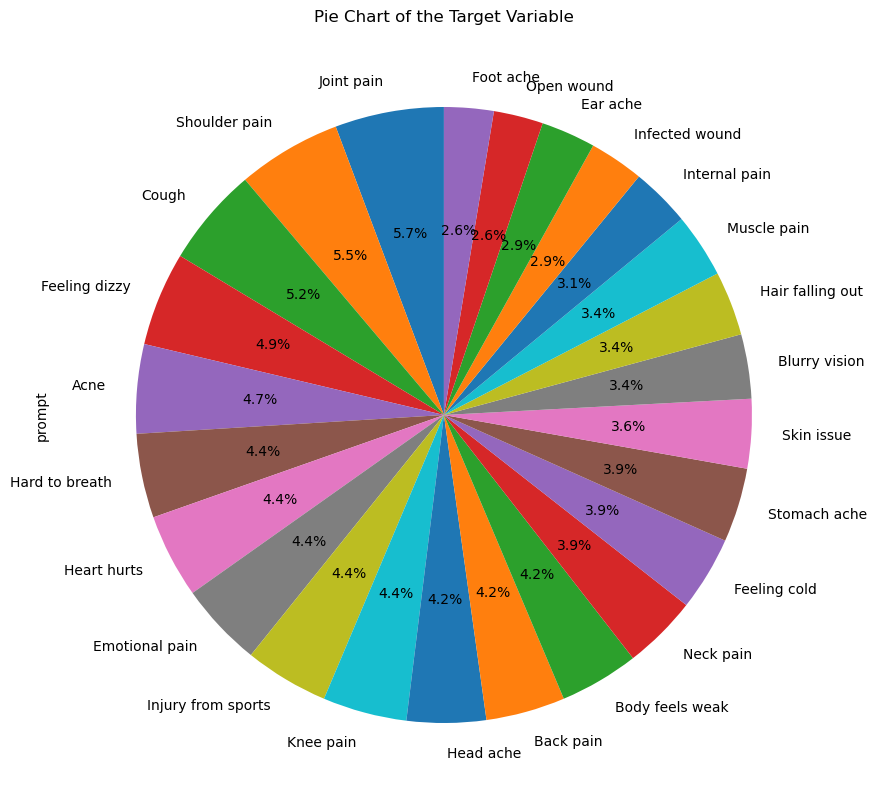

In [229]:
print("Validate:")
print()
plt.figure(figsize=(10, 10))
validate_df['prompt'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart of the Target Variable")
plt.show()

## Reducing the number of target classes by merging some of them

In [230]:
target_mapping = {
    'Emotional pain': 'Emotional and mental health',
    'Hair falling out': 'Hair and skin issues',
    'Heart hurts': 'Chest pain',
    'Infected wound': 'Wound and injury',
    'Foot ache': 'Leg and foot pain',
    'Shoulder pain': 'Shoulder pain',
    'Injury from sports': 'Wound and injury',
    'Skin issue': 'Hair and skin issues',
    'Stomach ache': 'Digestive issues',
    'Knee pain': 'Leg and foot pain',
    'Joint pain': 'Muscle and joint pain',
    'Hard to breathe': 'Respiratory issue',
    'Headache': 'Headache',
    'Body feels weak': 'General weakness',
    'Feeling dizzy': 'Dizziness and vertigo',
    'Back pain': 'Neck, back or spinal issues',
    'Open wound': 'Wound and injury',
    'Internal pain': 'Internal pain',
    'Blurry vision': 'Sensory issue',
    'Acne': 'Hair and skin issues',
    'Muscle pain': 'Muscle and joint pain',
    'Neck pain': 'Neck, back or spinal issues',
    'Cough': 'Respiratory issue',
    'Ear ache': 'Sensory issues',
    'Feeling cold': 'Feeling cold/hot'
}


In [231]:
train_df = train_df.assign(merged_prompt=train_df['prompt'].map(target_mapping))

print("Count of unique values:", train_df['merged_prompt'].nunique())
print()
print("The unique prompts in target columns are:")
print(train_df['merged_prompt'].unique())

Count of unique values: 16

The unique prompts in target columns are:
['Digestive issues' 'Muscle and joint pain' 'General weakness'
 'Chest pain' 'Shoulder pain' 'Sensory issues' 'Wound and injury'
 'Sensory issue' nan 'Internal pain' 'Hair and skin issues'
 'Respiratory issue' 'Emotional and mental health' 'Leg and foot pain'
 'Neck, back or spinal issues' 'Dizziness and vertigo' 'Feeling cold/hot']


Train:



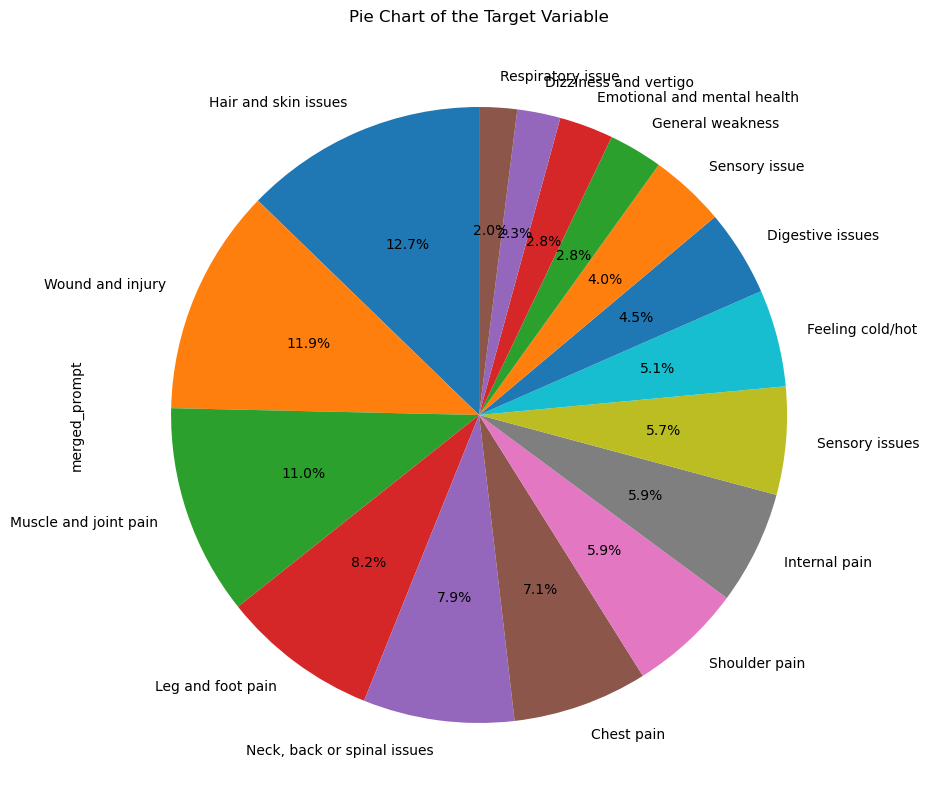

In [232]:
print("Train:")
print()
plt.figure(figsize=(10, 10))
train_df['merged_prompt'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart of the Target Variable")
plt.show()

In [233]:
test_df = test_df.assign(merged_prompt=test_df['prompt'].map(target_mapping))

print("Count of unique values:", test_df['merged_prompt'].nunique())
print()
print("The unique prompts in target columns are:")
print(test_df['merged_prompt'].unique())

Count of unique values: 16

The unique prompts in target columns are:
['Emotional and mental health' 'Hair and skin issues' 'Chest pain'
 'Wound and injury' 'Leg and foot pain' 'Shoulder pain' nan
 'General weakness' 'Dizziness and vertigo' 'Neck, back or spinal issues'
 'Internal pain' 'Sensory issue' 'Muscle and joint pain'
 'Respiratory issue' 'Sensory issues' 'Digestive issues'
 'Feeling cold/hot']


Test:



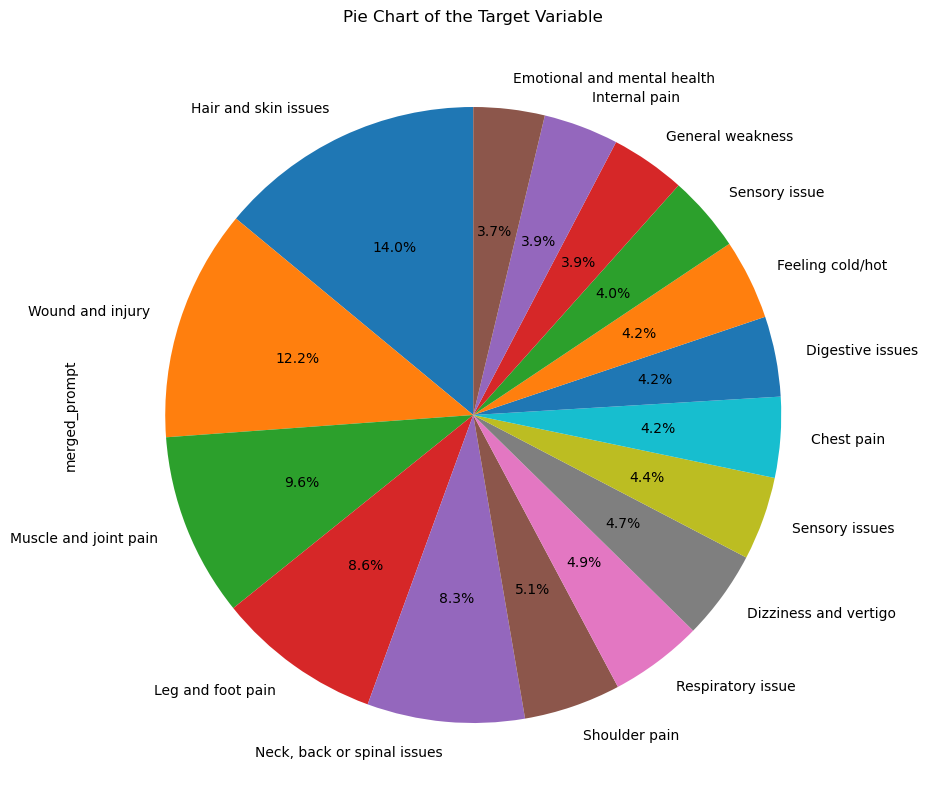

In [234]:
print("Test:")
print()
plt.figure(figsize=(10, 10))
test_df['merged_prompt'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart of the Target Variable")
plt.show()

In [235]:
validate_df = validate_df.assign(merged_prompt=validate_df['prompt'].map(target_mapping))

print("Count of unique values:", validate_df['merged_prompt'].nunique())
print()
print("The unique prompts in target columns are:")
print(validate_df['merged_prompt'].unique())

Count of unique values: 16

The unique prompts in target columns are:
[nan 'Hair and skin issues' 'Leg and foot pain'
 'Neck, back or spinal issues' 'Digestive issues' 'Respiratory issue'
 'Emotional and mental health' 'Dizziness and vertigo' 'Internal pain'
 'Wound and injury' 'Feeling cold/hot' 'Muscle and joint pain'
 'Sensory issue' 'General weakness' 'Shoulder pain' 'Chest pain'
 'Sensory issues']


Validate:



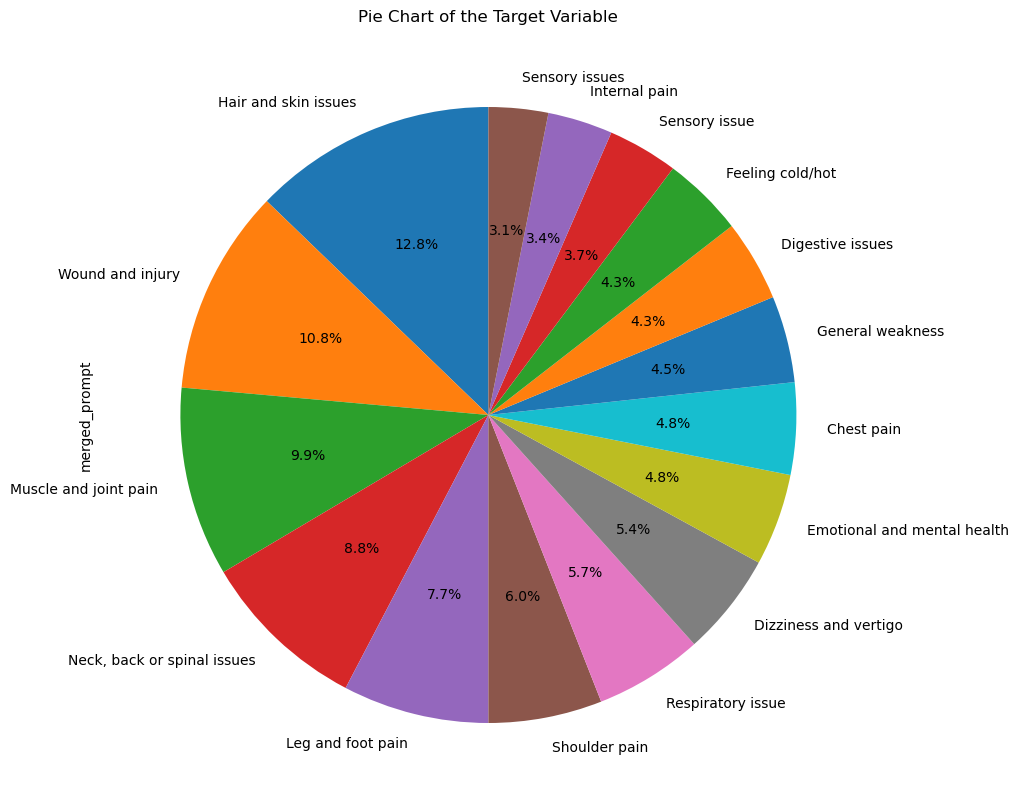

In [236]:
print("Validate:")
print()
plt.figure(figsize=(10, 10))
validate_df['merged_prompt'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart of the Target Variable")
plt.show()

In [237]:
print("Train: ",len(train_df))
print()
print("Test: ",len(test_df))
print()
print("Validate: ",len(validate_df))
print()

Train:  381

Test:  5895

Validate:  385

